**Import library**

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 19.4 MB/s 
     |████████████████████████████████| 7.6 MB 81.2 MB/s 
     |████████████████████████████████| 182 kB 83.8 MB/s 


In [2]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 30.6 MB/s 


In [3]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.3 MB 1.2 MB/s 
     |████████████████████████████████| 981 kB 62.0 MB/s 
     |████████████████████████████████| 265 kB 69.9 MB/s 
     |████████████████████████████████| 3.8 MB 77.4 MB/s 
     |████████████████████████████████| 468 kB 86.5 MB/s 
     |████████████████████████████████| 880 kB 74.9 MB/s 
  Created wheel for ktrain: filename=ktrain-0.32.3-py3-none-any.whl size=25313585 sha256=95a4d7e4d9ea092fb26dfbbe4607264a1be7676975acb312803a67e2b6e8b6a8
  Stored in directory: /root/.cache/pip/wheels/c4/a0/4b/38365824295b72c59f340fce7927cdb5438d2705f5dbbe47b7
  Created wheel for keras-bert: filename=keras_bert-0.89.0-py3-none-any.whl size=33516 sha256=f49dd91f71fbeb8b3a12b01589288414204320e39193a54cbc3d2acd35a623d9
  Stored in directory: /root/.cache/pip/wheels/a1/34/ed/6bbd71716d7bcea30d75e8bc5aeb94f4cb52636295c8343534
  Created wheel for keras-

In [4]:
!pip install pythainlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 29.1 MB/s 


In [5]:
import tensorflow as tf

from pythainlp.tokenize import word_tokenize, Tokenizer

import numpy as np
import pandas as pd 

import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

from pythainlp.corpus.common import thai_words
from pythainlp.corpus import thai_stopwords

import seaborn as sn
import matplotlib.pyplot as plt

import pickle as p
import plotly
import plotly.graph_objs as go

from sklearn.metrics import confusion_matrix,classification_report

from ktrain import text,load_predictor
import ktrain

from sklearn.model_selection import train_test_split
from transformers import AutoModel
from transformers import AutoTokenizer

MODEL_NAME = 'airesearch/wangchanberta-base-att-spm-uncased'

model = AutoModel.from_pretrained(MODEL_NAME)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

tokenizer.tokenize('<s>ประเทศไทยตอนบนมีฝนฟ้าคะนองและลมกระโชกแรงบางแห่ง ขอให้ระวังอันตรายจากฝนฟ้าคะนองและลมกระโชกแรง ภาคใต้ยังมีฝนต่อเนื่อง</s>')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Downloading:   0%|          | 0.00/546 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/404M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/282 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/883k [00:00<?, ?B/s]

['<s>',
 '▁',
 'ประเทศไทย',
 'ตอนบน',
 'มี',
 'ฝนฟ้าคะนอง',
 'และ',
 'ล',
 'มกระโชกแรง',
 'บางแห่ง',
 '▁ขอให้',
 'ระวัง',
 'อันตรายจาก',
 'ฝนฟ้าคะนอง',
 'และ',
 'ล',
 'มกระโชกแรง',
 '▁',
 'ภาคใต้',
 'ยังมี',
 'ฝน',
 'ต่อเนื่อง',
 '</s>']

**Define constant value for model**

In [6]:
# EPOCHS = 100
# BS = 32
# DIMENSION = 100

**Read data from each dataset**

In [7]:
df_kplus = pd.read_csv('/content/KPlus_Googleplay.csv')
df_scb = pd.read_csv('/content/SCB_Easy_Googleplay_cut.csv')
df_ktb = pd.read_csv('/content/Krungthai_next_Googleplay.csv')

**Remove some column from Kplus dataset**

In [8]:
df_kplus.head(4)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Class
0,9f20248d-8b73-408e-8e06-5556e5e342ad,นายมงคล เขียวบุญแย้ม,https://play-lh.googleusercontent.com/a/ALm5wu...,ชอบแอบนี้มากๆ5.5,5,0,NaN,2022-11-12 06:13:13,ขอขอบคุณ ที่ไว้วางใจใช้บริการ K PLUS ของธนาคาร...,2022-11-12 13:47:24,pos
1,864104fc-01d0-4a44-835d-f1ae41031bfd,Punpun aoorza Goodnow,https://play-lh.googleusercontent.com/a-/ACNPE...,ใช้มาตลอดพออัพเดทล่าสุดนี่เข้าไม่ได้เลยและเด้ง...,2,0,5.16.3,2022-11-12 06:07:28,ขออภัยในความไม่สะดวกที่ได้รับค่ะ เบื้องต้นรบกว...,2022-11-12 13:47:10,neg
2,8f8e9708-35aa-425d-b044-17acfa120fa2,PalmZer Ch,https://play-lh.googleusercontent.com/a-/ACNPE...,ช่วงนี้แอปชอบเปิดเอง ทั้งๆที่ไม่ได้ใช้ ขึ้นมาข...,3,0,5.16.3,2022-11-12 04:54:49,ขออภัยในความไม่สะดวกที่ได้รับนะคะ หากพบปัญหากา...,2022-11-12 16:28:57,neg
3,1225a715-8ad3-4093-90b8-71b3eeaeb7c7,ปรินทร์พร ทิพย์สุวรรณ,https://play-lh.googleusercontent.com/a-/ACNPE...,ช่วงนี้แอฟเด้งมาบ่อยเลยค่ะ ในขณะที่ใช้แอฟอื่นอ...,2,0,5.16.3,2022-11-12 04:39:23,ขออภัยในความไม่สะดวกที่ได้รับนะคะ เบื้องต้นรบก...,2022-11-12 16:28:47,neg


In [9]:
df_kplus.rename(columns = {'at':'timestamp', 'Class':'class'}, inplace = True)
kplus_remove_columns = ['reviewId', 'userName','userImage','replyContent','repliedAt']
df_kplus.drop(kplus_remove_columns, axis=1, inplace=True)

In [10]:
df_kplus.columns

Index(['content', 'score', 'thumbsUpCount', 'reviewCreatedVersion',
       'timestamp', 'class'],
      dtype='object')

**Remove some column from SCB dataset**

In [11]:
df_scb.head(4)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Score
0,bb808b6e-7b5f-4708-9cf0-cce451e6b78b,ใหม ใหม่,https://play-lh.googleusercontent.com/a-/ACNPE...,ขยันอัปเดตจัง แต่!!ไม่มีอะไรดีขึ้นเลย,1.0,0.0,3.56.0,2022-11-12 14:47:24,NaN,NaN,neg
1,00475d91-ada3-4416-b84d-6e66c8b18f2b,ความลับในใจ,https://play-lh.googleusercontent.com/a-/ACNPE...,เยี่ยม,5.0,0.0,3.56.0,2022-11-12 13:38:43,NaN,NaN,neg
2,11a3b575-57a5-4922-98b7-1d1e85c27a57,นางสาวชนานุช ดอกประทุม,https://play-lh.googleusercontent.com/a/ALm5wu...,ไม่สามารถโหลดเพื่ออัพเดทแอปได้เมมเต็ม,5.0,0.0,3.56.0,2022-11-12 13:06:09,NaN,NaN,neg
3,cf0553f1-6bcf-499f-82e3-13757311f66e,SuKuRuLo KoHeJiNaTo,https://play-lh.googleusercontent.com/a/ALm5wu...,แอปเป็นอะไรวะทำไทถึงเข้าไม่ได้อ่า แก้ไขหน่อยนะ,1.0,0.0,3.56.0,2022-11-12 13:05:33,NaN,NaN,neg


In [12]:
df_scb.rename(columns = {'at':'timestamp', 'Score':'class'}, inplace = True)
scb_remove_columns = ['reviewId', 'userName','userImage','replyContent','repliedAt']
df_scb.drop(kplus_remove_columns, axis=1, inplace=True)

In [13]:
df_scb.columns

Index(['content', 'score', 'thumbsUpCount', 'reviewCreatedVersion',
       'timestamp', 'class'],
      dtype='object')

**Remove some column from KTB dataset**

In [14]:
df_ktb.head(4)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,Time Stamp,Label,Unnamed: 9
0,bdfd375a-701e-4bc4-a5ff-ac1405a4f063,สุริยา ณ.สมุทร,https://play-lh.googleusercontent.com/a-/ACNPE...,ดี,5,0,11.9.1,2022-11-12 07:17:54,pos,NaN
1,9181b9cf-bc01-4b90-bc65-aa67ae5ebb81,Jumlean Luecha,https://play-lh.googleusercontent.com/a/ALm5wu...,Good,5,0,11.9.1,2022-11-12 06:53:18,pos,NaN
2,f14a5783-0f0f-4c1c-b9d4-7ea0d78f52cf,SAMLEE TRUDMAKKA,https://play-lh.googleusercontent.com/a/ALm5wu...,ให้บริการดีขอบคุณมากค่ะ,5,0,11.9.1,2022-11-12 06:50:52,pos,NaN
3,3ad1db88-f0c1-4e0f-8853-92352f070acc,มาหามะรอมือลี เห็ง,https://play-lh.googleusercontent.com/a/ALm5wu...,รุ่.,4,0,11.6.3,2022-11-12 06:27:40,?,NaN


In [15]:
df_ktb.rename(columns = {'Time Stamp':'timestamp', 'Label':'class'}, inplace = True)
ktb_remove_columns = ['reviewId', 'userName','userImage','Unnamed: 9']
df_ktb.drop(ktb_remove_columns, axis=1, inplace=True)

In [16]:
df_ktb.columns

Index(['content', 'score', 'thumbsUpCount', 'reviewCreatedVersion',
       'timestamp', 'class'],
      dtype='object')

**Merged dataset into dataframe**

In [17]:
df = pd.concat([df_kplus, df_scb, df_ktb], ignore_index=True, sort=False)

In [18]:
df.head()

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class
0,ชอบแอบนี้มากๆ5.5,5.0,0.0,NaN,2022-11-12 06:13:13,pos
1,ใช้มาตลอดพออัพเดทล่าสุดนี่เข้าไม่ได้เลยและเด้ง...,2.0,0.0,5.16.3,2022-11-12 06:07:28,neg
2,ช่วงนี้แอปชอบเปิดเอง ทั้งๆที่ไม่ได้ใช้ ขึ้นมาข...,3.0,0.0,5.16.3,2022-11-12 04:54:49,neg
3,ช่วงนี้แอฟเด้งมาบ่อยเลยค่ะ ในขณะที่ใช้แอฟอื่นอ...,2.0,0.0,5.16.3,2022-11-12 04:39:23,neg
4,ดี,5.0,0.0,5.16.3,2022-11-12 04:34:57,pos


**Check data type**

In [19]:
df.dtypes

content                  object
score                   float64
thumbsUpCount           float64
reviewCreatedVersion     object
timestamp                object
class                    object
dtype: object

**Check null value and clean column**

In [20]:
df.isnull().sum()

content                   1
score                     1
thumbsUpCount             1
reviewCreatedVersion    751
timestamp                 1
class                     8
dtype: int64

In [21]:
df['content'] = df['content'].astype('str') 
df['content'] = df['content'].replace(np.nan,"")

In [22]:
df['score'] = df['score'].replace(np.nan,0)

In [23]:
df['thumbsUpCount'] = df['thumbsUpCount'].replace(np.nan,0)

In [24]:
df['reviewCreatedVersion'] = df['reviewCreatedVersion'].astype('str') 
df['reviewCreatedVersion'] = df['reviewCreatedVersion'].replace("nan","0.0.0")
df['reviewCreatedVersion'] = df['reviewCreatedVersion'].replace("","0.0.0")

In [25]:
df['timestamp'] = df['timestamp'].astype('str') 
df['timestamp'] = df['timestamp'].replace(np.nan,"")

In [26]:
df['class'].value_counts()

pos    1800
neg    1522
?       214
xxx       6
Name: class, dtype: int64

In [27]:
df['class'] = df['class'].astype('str') 
df['class'] = df['class'].replace("nan","?")
df['class'] = df['class'].replace("xxx","?")

In [28]:
df['class'].value_counts()

pos    1800
neg    1522
?       228
Name: class, dtype: int64

In [29]:
df.isnull().sum()

content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
timestamp               0
class                   0
dtype: int64

**From above class value count**

* We should sample class with equal row number. (pos=1522, neg=1522)
* For alternative class("?"), predict in next model

In [30]:
pos_df = df[df['class'] == "pos"].sample(1522, random_state = 42)
pos_df

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class
3110,ถูกใจ,5.0,0.0,11.9.1,2022-10-25 07:29:15,pos
1756,ใช้ด้ดีมากๆ,5.0,0.0,3.60.0,2022-10-31 06:56:03,pos
1641,สดวกใช้ง่าย,5.0,0.0,3.60.0,2022-11-04 19:25:52,pos
293,ดี,5.0,0.0,5.16.1,2022-11-06 18:19:54,pos
2335,ฉันชอบมากทุกวัน❤️❤️❤️,5.0,1.0,3.59.0,2022-10-07 05:03:46,pos
...,...,...,...,...,...,...
3516,ขอบคุณครับ,5.0,0.0,11.9.1,2022-10-11 10:17:21,pos
3339,ใช้แล้วดี,3.0,0.0,11.8.1,2022-10-18 12:54:47,pos
1017,ยอดเยี่ยมชอบมาก,5.0,0.0,5.16.1,2022-10-22 10:45:54,pos
1731,ดีมาก,5.0,0.0,3.60.0,2022-10-31 22:57:43,pos


In [31]:
neg_df = df[df['class'] == "neg"].sample(1522, random_state = 42)
neg_df

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class
1347,พอจะรีบใช้งาน มีปัญหาทุกครั้ง,1.0,0.0,5.16.1,2022-10-16 10:02:21,neg
2536,อัปเดตแทนที่แอพพลิเคชันจะดีกว่าเดิมแต่ยิ่งอัปเ...,1.0,7.0,3.59.0,2022-09-30 07:32:45,neg
3366,ทำมัยเบอร์ต้องตรงเวลาสำคัญทำไม่ได้เลยแย่มากๆ,1.0,0.0,11.9.1,2022-10-17 14:05:44,neg
2770,มีปัญหาอยู่อย่างหนึ่งและก้เปนอยู่บ่อยๆ..เวลาโอ...,3.0,6.0,11.9.1,2022-11-03 03:47:13,neg
2411,อยู่ดีๆแอปก้อล็อคเองเฉย 😒😒,2.0,0.0,0.0.0,2022-10-04 11:40:20,neg
...,...,...,...,...,...,...
2595,ห่วยแตกโอนเงินไม่เข้า,1.0,0.0,0.0.0,2022-11-11 00:28:13,neg
3043,สิ้นเดือนมีปัญหาตลอด ทำไมไม่เคยหาทางแก้ไขเนี่ย...,1.0,0.0,11.9.1,2022-10-25 08:52:53,neg
2143,และ app เป็นไรชอบล่มตอน 23:00 น กับเที่ยงคืนแล...,1.0,0.0,0.0.0,2022-10-12 18:49:26,neg
3329,แย่ชิปหาย ปรุงเถอะ เวลาเปลี่ยนเครื่องยังต้องแส...,1.0,6.0,11.9.1,2022-10-19 01:49:12,neg


In [32]:
unknown_df = df[df['class'] == "?"]
unknown_df

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class
84,CC6844421,5.0,0.0,5.16.3,2022-11-10 18:04:18,?
94,ิอิอิ,5.0,0.0,5.16.3,2022-11-10 14:18:38,?
144,i ij!!,3.0,0.0,5.16.1,2022-11-09 19:25:31,?
147,ดี,4.0,0.0,0.0.0,2022-11-09 15:16:32,?
164,~ช,5.0,0.0,5.16.1,2022-11-09 10:29:10,?
...,...,...,...,...,...,...
3524,กู้เงินสินเชื่อ,4.0,0.0,0.0.0,2022-10-11 05:17:39,?
3526,ลองใช้ก่อน,1.0,0.0,0.0.0,2022-10-11 04:44:04,?
3527,11/10/22 09:00-09:46เข้าแอพไม่ได้ครับ,3.0,0.0,11.5.5,2022-10-11 02:46:25,?
3541,ตคคตจ,4.0,0.0,11.9.1,2022-10-10 09:51:25,?


**Text PreProcessing**
*   Change Case
*   Removing Punctuations
*   Change Custom Words
*   Tokenization
*   Removing Stop Words
*   Change Correct Words


In [33]:
sentiment_df = pd.concat([neg_df, pos_df])
sentiment_df

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class
1347,พอจะรีบใช้งาน มีปัญหาทุกครั้ง,1.0,0.0,5.16.1,2022-10-16 10:02:21,neg
2536,อัปเดตแทนที่แอพพลิเคชันจะดีกว่าเดิมแต่ยิ่งอัปเ...,1.0,7.0,3.59.0,2022-09-30 07:32:45,neg
3366,ทำมัยเบอร์ต้องตรงเวลาสำคัญทำไม่ได้เลยแย่มากๆ,1.0,0.0,11.9.1,2022-10-17 14:05:44,neg
2770,มีปัญหาอยู่อย่างหนึ่งและก้เปนอยู่บ่อยๆ..เวลาโอ...,3.0,6.0,11.9.1,2022-11-03 03:47:13,neg
2411,อยู่ดีๆแอปก้อล็อคเองเฉย 😒😒,2.0,0.0,0.0.0,2022-10-04 11:40:20,neg
...,...,...,...,...,...,...
3516,ขอบคุณครับ,5.0,0.0,11.9.1,2022-10-11 10:17:21,pos
3339,ใช้แล้วดี,3.0,0.0,11.8.1,2022-10-18 12:54:47,pos
1017,ยอดเยี่ยมชอบมาก,5.0,0.0,5.16.1,2022-10-22 10:45:54,pos
1731,ดีมาก,5.0,0.0,3.60.0,2022-10-31 22:57:43,pos


Change Case

In [34]:
sentiment_df['clean_comments'] = sentiment_df['content'].fillna('').apply(lambda x: x.lower())
sentiment_df.head()

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class,clean_comments
1347,พอจะรีบใช้งาน มีปัญหาทุกครั้ง,1.0,0.0,5.16.1,2022-10-16 10:02:21,neg,พอจะรีบใช้งาน มีปัญหาทุกครั้ง
2536,อัปเดตแทนที่แอพพลิเคชันจะดีกว่าเดิมแต่ยิ่งอัปเ...,1.0,7.0,3.59.0,2022-09-30 07:32:45,neg,อัปเดตแทนที่แอพพลิเคชันจะดีกว่าเดิมแต่ยิ่งอัปเ...
3366,ทำมัยเบอร์ต้องตรงเวลาสำคัญทำไม่ได้เลยแย่มากๆ,1.0,0.0,11.9.1,2022-10-17 14:05:44,neg,ทำมัยเบอร์ต้องตรงเวลาสำคัญทำไม่ได้เลยแย่มากๆ
2770,มีปัญหาอยู่อย่างหนึ่งและก้เปนอยู่บ่อยๆ..เวลาโอ...,3.0,6.0,11.9.1,2022-11-03 03:47:13,neg,มีปัญหาอยู่อย่างหนึ่งและก้เปนอยู่บ่อยๆ..เวลาโอ...
2411,อยู่ดีๆแอปก้อล็อคเองเฉย 😒😒,2.0,0.0,0.0.0,2022-10-04 11:40:20,neg,อยู่ดีๆแอปก้อล็อคเองเฉย 😒😒


Removing Punctuations

In [35]:
pun = '"#\'()*,-.;<=>[\\]^_`{|}~'
pun

'"#\'()*,-.;<=>[\\]^_`{|}~'

In [36]:
sentiment_df['clean_comments'] = sentiment_df['clean_comments'].str.replace(r'[%s]' % (pun), '', regex=True)
sentiment_df.sample(5)

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class,clean_comments
981,ห่วยมาก,1.0,12.0,5.16.1,2022-10-23 11:43:47,neg,ห่วยมาก
1552,ล่มบ่อย,1.0,0.0,3.60.0,2022-11-10 22:10:22,neg,ล่มบ่อย
1576,ผมรักไทยพาณิชย์อยู่เเล้ว,3.0,1.0,3.60.0,2022-11-09 09:45:31,neg,ผมรักไทยพาณิชย์อยู่เเล้ว
124,ทำไมแอพถึงชอบเปิดขึ้นมาเอง แล้วก็ปิดไปทันที เป...,2.0,3.0,5.16.3,2022-11-10 03:34:59,neg,ทำไมแอพถึงชอบเปิดขึ้นมาเอง แล้วก็ปิดไปทันที เป...
609,ช่วยแก้ไขในเรื่องของสลิปหน่อย.. ตัวเลขบอกจำนวน...,2.0,0.0,5.15.8,2022-11-01 10:41:23,neg,ช่วยแก้ไขในเรื่องของสลิปหน่อย ตัวเลขบอกจำนวนเง...


Custom word

In [37]:
THAI_CUSTOM_WORDS = '/content/thai_custom_words2.txt'
THAI_CORRECT_WORDS = '/content/thai_correct_words.txt'

In [38]:
with open(THAI_CUSTOM_WORDS, encoding='utf8') as f:
    words = [line.strip() for line in f]

words

['เคแบง',
 'เคแบงก์',
 'Kplus',
 'กรุงไทย',
 'เคพลัส',
 'เคพัส',
 'K PLUS',
 'KPLUS',
 'k plus',
 'SCB',
 'ไทยพานิต',
 'คิวอาร์โค้ด',
 'กสิกรไทย',
 'คิวอาร์',
 'รีบูต',
 'ดีเลย์',
 'แอปพลิเคชัน',
 'แอป',
 'แอบ',
 'แอ๊ป',
 'แอฟ',
 'แอ้ป',
 'แอบ',
 'แอพ',
 'แอพปริชั่น',
 'เธ๊ออออ',
 'สดวก',
 'ก้อ',
 'ใด้',
 'จังกวะ',
 'หร้า',
 'เปยี่ยน',
 'เป้น',
 'บันชี',
 'บัชชี',
 'โคต',
 'โครต',
 'ไห้',
 'อารมย์',
 'สะดววก',
 'ธนาคาน',
 'รำคาน',
 'สามรถ',
 'คัฟ',
 'อัพเดต',
 'อัพเดท',
 'อัพเดท',
 'อัปเดท',
 'อัทเดท',
 'ครัย',
 'เรย',
 'งา่ย',
 'จัย',
 'ระหัส',
 'มรึง',
 'ธนาคาา',
 'ธนคาร',
 'บรืการ']

In [39]:
custom_words_list = set(thai_words())
len(custom_words_list)

62055

In [40]:
custom_words_list.update(words)
len(custom_words_list)

62099

Tokenization

In [41]:
custom_tokenizer = Tokenizer(custom_words_list)

In [42]:
sentiment_df['clean_comments'] = sentiment_df['clean_comments'].apply(lambda x: custom_tokenizer.word_tokenize(x))

In [43]:
sentiment_df.sample(5)

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class,clean_comments
1320,Ok,2.0,1.0,5.12.2,2022-10-16 23:14:42,pos,[ok]
1022,ดีเยี่ยมมากเลยคับสะดวกสบายขึ้นเยอะเลย,5.0,0.0,5.16.1,2022-10-22 07:57:23,pos,"[ดีเยี่ยม, มาก, เลย, คับ, สะดวกสบาย, ขึ้น, เยอ..."
1649,ดี,5.0,0.0,0.0.0,2022-11-04 10:12:23,pos,[ดี]
924,ดีงามทำได้หมด,5.0,0.0,5.16.1,2022-10-25 02:09:38,pos,"[ดีงาม, ทำได้, หมด]"
320,ดีครับ,5.0,0.0,5.16.0,2022-11-06 09:25:55,pos,"[ดี, ครับ]"


In [44]:
tokenized_doc = sentiment_df['clean_comments']
tokenized_doc[:10]

1347          [พอ, จะ, รีบ, ใช้งาน,  , มีปัญหา, ทุกครั้ง]
2536    [อัปเดต, แทนที่, แอพพลิเคชัน, จะ, ดีกว่า, เดิม...
3366    [ทำ, มัย, เบอร์, ต้อง, ตรงเวลา, สำคัญ, ทำ, ไม่...
2770    [มีปัญหา, อยู่, อย่างหนึ่ง, และ, ก้เปน, อยู่, ...
2411           [อยู่ดีๆ, แอป, ก้อ, ล็อค, เอง, เฉย,  , 😒😒]
1054    [ใช้, ยุ่งยาก, ชิบหาย,  , บาง, คนใช้, รายเดือน...
2134    [ทำไม, ต้อง, ติดต่อ, ธนาคาร, ครับ, เข้าไป, แล้...
3440                                [ระบบ, ช้า, มาก, ค่ะ]
2447    [แอป, มี, ปัญญา, หา, อะไร, หนักหนา, ครับ, ล่ม,...
2514    [จำได้, ว่า, เคย, ให้คะแนน, แอป, ดีมาก,  , แต่...
Name: clean_comments, dtype: object

Delete english stop word

In [45]:
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

In [46]:
tokenized_doc[:10]

1347          [พอ, จะ, รีบ, ใช้งาน,  , มีปัญหา, ทุกครั้ง]
2536    [อัปเดต, แทนที่, แอพพลิเคชัน, จะ, ดีกว่า, เดิม...
3366    [ทำ, มัย, เบอร์, ต้อง, ตรงเวลา, สำคัญ, ทำ, ไม่...
2770    [มีปัญหา, อยู่, อย่างหนึ่ง, และ, ก้เปน, อยู่, ...
2411           [อยู่ดีๆ, แอป, ก้อ, ล็อค, เอง, เฉย,  , 😒😒]
1054    [ใช้, ยุ่งยาก, ชิบหาย,  , บาง, คนใช้, รายเดือน...
2134    [ทำไม, ต้อง, ติดต่อ, ธนาคาร, ครับ, เข้าไป, แล้...
3440                                [ระบบ, ช้า, มาก, ค่ะ]
2447    [แอป, มี, ปัญญา, หา, อะไร, หนักหนา, ครับ, ล่ม,...
2514    [จำได้, ว่า, เคย, ให้คะแนน, แอป, ดีมาก,  , แต่...
Name: clean_comments, dtype: object

Delete thai stop word

In [47]:
th_stop_words = list(thai_stopwords())
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in th_stop_words])

In [48]:
tokenized_doc[:10]

1347                            [รีบ, ใช้งาน,  , มีปัญหา]
2536    [อัปเดต, แทนที่, แอพพลิเคชัน, ดีกว่า, เดิม, อั...
3366                [ทำ, มัย, เบอร์, ตรงเวลา, ทำ, แย่มาก]
2770    [มีปัญหา, ก้เปน, เวลา, โอน, เสด, สลิป, ภาพ, หา...
2411                     [อยู่ดีๆ, แอป, ก้อ, ล็อค,  , 😒😒]
1054    [ยุ่งยาก, ชิบหาย,  , คนใช้, รายเดือน,  , เติม,...
2134     [ติดต่อ, ธนาคาร, เข้าไป, แล้วก็, ติดต่อ, ธนาคาร]
3440                                               [ระบบ]
2447    [แอป, ปัญญา, หา, หนักหนา, ล่ม, หยุด, จ่าย, ลูก...
2514    [จำได้, ให้คะแนน, แอป, ดีมาก,  , ตอนนี้, ติดลบ...
Name: clean_comments, dtype: object

Correct word

In [49]:
with open(THAI_CORRECT_WORDS) as f:
    thai_correct_word_list = [line.strip() for line in f]
    
thai_correct_word_list

['แอป แอปพลิเคชัน',
 'แอบ แอปพลิเคชัน',
 'แอ๊ป แอปพลิเคชัน',
 'แอฟ แอปพลิเคชัน',
 'แอ้ป แอปพลิเคชัน',
 'แอบ แอปพลิเคชัน',
 'แอพ แอปพลิเคชัน',
 'แอพปริชั่น แอปพลิเคชัน',
 'เธ๊ออออ เธอ',
 'สดวก สะดวก',
 'ก้อ ก็',
 'ใด้ ได้',
 'จังกวะ จังหวะ',
 'หร้า หน้า',
 'เปยี่ยน เปลี่ยน',
 'เป้น เป็น',
 'บันชี บัญชี',
 'บัชชี บัญชี',
 'โคต โคตร',
 'โครต โคตร',
 'ไห้ ให้',
 'อารมย์ อารมณ์',
 'สะดววก สะดวก',
 'ธนาคาน ธนาคาร',
 'รำคาน รำคาญ',
 'สามรถ สามารถ',
 'คัฟ ครับ',
 'อัพเดต อัปเดต',
 'อัพเดท อัปเดต',
 'อัพเดท อัปเดต',
 'อัปเดท อัปเดต',
 'อัทเดท อัปเดต',
 'ครัย ครับ',
 'เรย เลย',
 'งา่ย ง่าย',
 'จัย ใจ',
 'ระหัส รหัส',
 'มรึง มึง',
 'ธนาคาา ธนาคาร',
 'ธนคาร ธนาคาร',
 'บรืการ บริการ']

In [50]:
correct_pair={}

for pair in thai_correct_word_list:
    correct_pair[pair.split()[0].strip()]=pair.split()[1].strip() 

In [51]:
doc = []
for tokenized_list in tokenized_doc:
    for index, word in enumerate(tokenized_list):
        if word in correct_pair:
            tokenized_list[index]=correct_pair[word]
    doc.append(tokenized_list)
    
tokenized_doc = pd.Series(doc)

In [52]:
tokenized_doc = tokenized_doc.to_list()

De-tokennization

In [53]:
# de-tokenization
detokenized_doc = []
for i in range(len(tokenized_doc)):
#     print(tokenized_doc[i])
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)
    
sentiment_df['clean_comments'] = detokenized_doc

In [54]:
sentiment_df.head()

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class,clean_comments
1347,พอจะรีบใช้งาน มีปัญหาทุกครั้ง,1.0,0.0,5.16.1,2022-10-16 10:02:21,neg,รีบ ใช้งาน มีปัญหา
2536,อัปเดตแทนที่แอพพลิเคชันจะดีกว่าเดิมแต่ยิ่งอัปเ...,1.0,7.0,3.59.0,2022-09-30 07:32:45,neg,อัปเดต แทนที่ แอพพลิเคชัน ดีกว่า เดิม อัปเดต แ...
3366,ทำมัยเบอร์ต้องตรงเวลาสำคัญทำไม่ได้เลยแย่มากๆ,1.0,0.0,11.9.1,2022-10-17 14:05:44,neg,ทำ มัย เบอร์ ตรงเวลา ทำ แย่มาก
2770,มีปัญหาอยู่อย่างหนึ่งและก้เปนอยู่บ่อยๆ..เวลาโอ...,3.0,6.0,11.9.1,2022-11-03 03:47:13,neg,มีปัญหา ก้เปน เวลา โอน เสด สลิป ภาพ หาย ภาพ คร...
2411,อยู่ดีๆแอปก้อล็อคเองเฉย 😒😒,2.0,0.0,0.0.0,2022-10-04 11:40:20,neg,อยู่ดีๆ แอปพลิเคชัน ก็ ล็อค 😒😒


Split test data

In [55]:
temp_df = sentiment_df

sentiment_df = temp_df.sample(2435, random_state = 42)
test_df = temp_df.sample(609, random_state = 42) #total 3044 rows, train 609 rows, test 2435 rows

In [56]:
def max_length(words):
    return(len(max(words, key = len)))

In [57]:
max_length = max_length(tokenized_doc)
max_length

132

**Define WanchanBERT model**

preprocessing train...
language: th
train sequence lengths:
	mean : 5
	95percentile : 17
	99percentile : 32


/usr/local/lib/python3.8/dist-packages/ktrain/utils.py:745: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


Is Multi-Label? False
preprocessing test...
language: th
test sequence lengths:
	mean : 5
	95percentile : 19
	99percentile : 33


/usr/local/lib/python3.8/dist-packages/ktrain/text/preprocessor.py:1170: UserWarning: Could not load a Tensorflow version of model. (If this worked before, it might be an out-of-memory issue.) Attempting to download/load PyTorch version as TensorFlow model using from_pt=True. You will need PyTorch installed for this.
  warnings.warn(


Model: "tf_camembert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 roberta (TFRobertaMainLayer  multiple                 104653824 
 )                                                               
                                                                 
 classifier (TFRobertaClassi  multiple                 592130    
 ficationHead)                                                   
                                                                 
Total params: 105,245,954
Trainable params: 105,245,954
Non-trainable params: 0
_________________________________________________________________


begin training using triangular learning rate policy with max lr of 1e-05...
Epoch 1/15
325/325 [==============================] - 214s 605ms/step - loss: 0.6107 - accuracy: 0.6638 - val_loss: 0.5717 - val_accuracy: 0.6961
Epoch 2/15
325/325 [==============================]

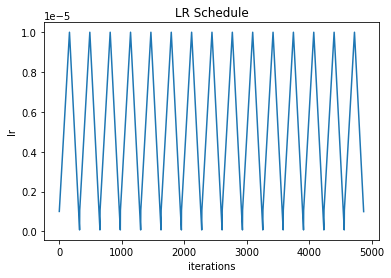

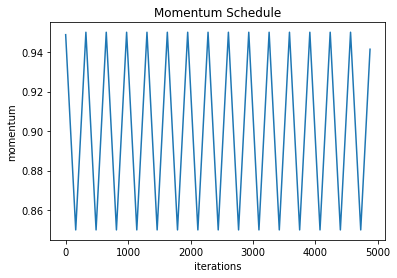

In [58]:
classname =['pos','neg']

maxlen = 416
t = text.Transformer(MODEL_NAME, maxlen=maxlen, class_names=classname)

x = sentiment_df['clean_comments'].tolist()
y = sentiment_df['class'].tolist()
x_train, x_val, y_train, y_val = train_test_split(x, y , test_size=0.2, random_state=42)

trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_val, y_val)
model = t.get_classifier()
model.summary()

learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)
#learner.lr_find(show_plot=True)
history = learner.autofit(1e-5, 15,checkpoint_folder='wangchanberta_checkpoint')

learner.validate(class_names=t.get_classes())

learner.plot('lr')

learner.plot('momentum')

In [59]:
h1 = go.Scatter(y=history.history['loss'], 
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=history.history['val_loss'], 
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [60]:
h1 = go.Scatter(y=history.history['accuracy'], 
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=history.history['val_accuracy'], 
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [61]:
model.load_weights('wangchanberta_checkpoint/weights-01.hdf5')

In [62]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

In [63]:
predictor = ktrain.get_predictor(learner.model, t)

In [64]:
cat = predictor.get_classes()
cat

['neg', 'pos']

In [65]:
predictor.predict_proba("ฝ้ายจะไม่ทน กับคนนิสัยไม่ดี") 

1/1 [==============================] - 1s 1s/step


array([0.25507808, 0.744922  ], dtype=float32)

In [66]:
predictor.predict("ฝ้ายจะไม่ทน กับคนนิสัยไม่ดี") 

1/1 [==============================] - 0s 71ms/step


'pos'

In [67]:
pretrain_name = 'wangchanberta'

In [68]:
predictor.save(pretrain_name)

In [69]:
reloaded_predictor = ktrain.load_predictor(pretrain_name)

In [70]:
reloaded_predictor.predict("ฝ้ายจะไม่ทน กับคนนิสัยไม่ดี")

1/1 [==============================] - 2s 2s/step


'pos'

In [71]:
type(x_val)

list

In [72]:
y_true = y_val

In [73]:
x_pred = x_val
x_pred[:5]

['แย่มาก ธนาคาร เนี้ย กด ตัง กินข้าว เสือก ล๊อก บัตร ติดต่อ ธนาคาร คึ บริการ ดีกว่า ไหม อ่า ว่าง วะ ธนาคาร พนักงานบริษัท สาขา บิ๊กซี แย่มาก ยกเลิก บัตรเครดิต ลูกค้า ก๊ง ง บัญชี ง สาขา แบบนี้ ก๊ หร',
 'ความเสถียร แย่มาก ปรับปรุง ฉิบหาย',
 'ดี ทันสมัย ความต้องการ ผู้ใช้งาน   ฟังก์ชั่น ดู สรุป ยอดเงิน รายการ เข้าออก เดือน   ทั้งปี   ไม่ต้อง ส เต ท เม้น',
 'ดี',
 'สุดยอด บริการ']

In [74]:
preds = reloaded_predictor.predict(x_pred)

16/16 [==============================] - 4s 227ms/step


In [75]:
cm = confusion_matrix(y_true, preds)

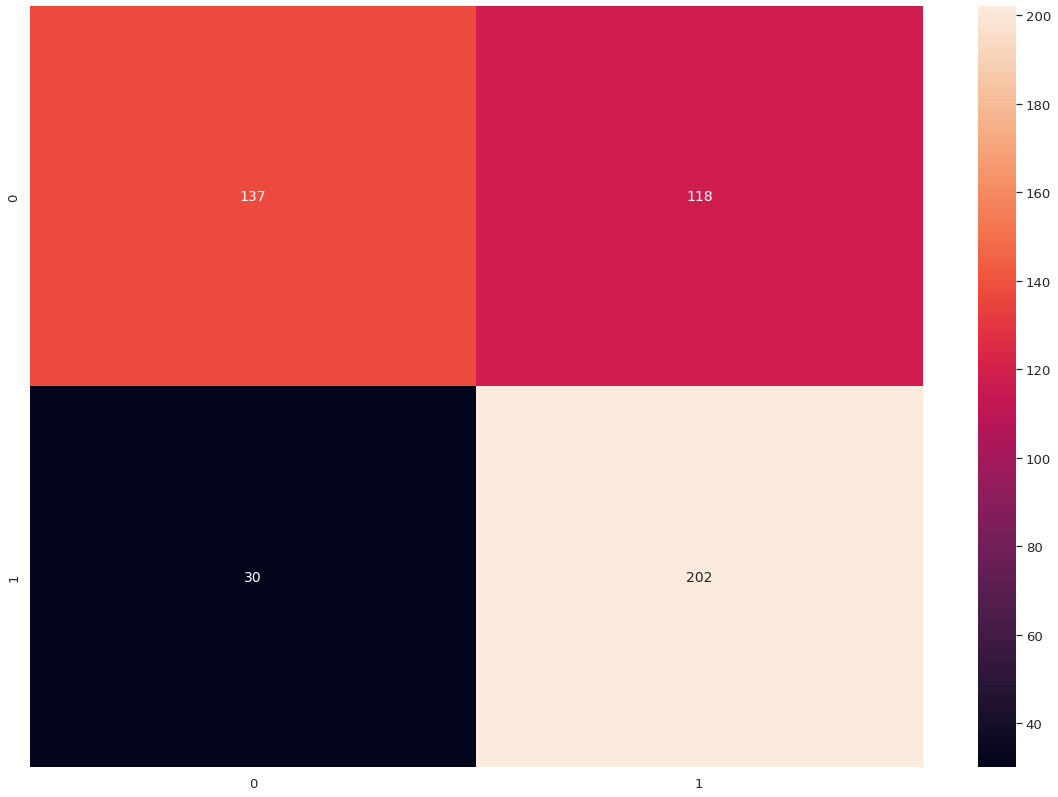

In [76]:
df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(20,14))
sn.set(font_scale=1.2) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 14}, fmt='g') # for num predict size

plt.show()

In [77]:
print(classification_report(y_true, preds, target_names=cat, digits=4))

              precision    recall  f1-score   support

         neg     0.8204    0.5373    0.6493       255
         pos     0.6312    0.8707    0.7319       232

    accuracy                         0.6961       487
   macro avg     0.7258    0.7040    0.6906       487
weighted avg     0.7303    0.6961    0.6886       487



**WanchanBERT model**

Prepare test data

In [78]:
test_df.head()

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class,clean_comments
2748,สแกนใบหน้าไม่ดีระบบควรปรับปรุง,1.0,0.0,11.9.1,2022-11-04 06:45:23,neg,สแกน ใบหน้า ดี ระบบ ปรับปรุง
2694,ใช้งานสะดวกสบาย,5.0,0.0,11.9.1,2022-11-06 17:08:55,pos,ใช้งาน สะดวกสบาย
1931,แย่มาก​ ปรับปรุงไห้ทัน​ค่ายอื่นด้วยค่ะ​,1.0,0.0,0.0.0,2022-10-22 13:27:32,neg,แย่มาก ​ ปรับปรุง ให้ ​ ค่าย ​
1575,ปิดปรับปรุงบ่อยมากคะแข้ไขั,3.0,0.0,0.0.0,2022-11-09 10:37:38,neg,ปรับปรุง แข้ ไข ั
1934,โหลดไม่ได้,5.0,0.0,3.59.0,2022-10-22 10:12:28,neg,โหลด


In [79]:
x_pred = test_df['content'].to_list()

In [80]:
y_true = test_df['class'].to_list()

In [81]:
preds = reloaded_predictor.predict(x_pred)

20/20 [==============================] - 5s 234ms/step


In [82]:
preds

['pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',


Add prediction value to new column

In [83]:
test_df["predict_class"] = np.array(preds)

test_df.sample(20)

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class,clean_comments,predict_class
1650,ดี,5.0,1.0,3.60.0,2022-11-04 09:08:01,pos,ดี,pos
1099,ช่วงนี้ทำไมอยู่ๆก็เด้งเข้าแอปเองครับ ปกติจะไม่...,1.0,1.0,5.16.1,2022-10-20 14:47:38,neg,อยู่ๆ เด้ง แอปพลิเคชัน ปกติ เด้ง แป ป กลับ...,neg
330,เปลี่ยนเครื่องใหม่แต่เข้าไม่ได้ ลบแล้วตั้งใหม่...,1.0,0.0,5.16.1,2022-11-06 06:52:39,neg,เครื่อง ลบ ตั้งใหม่ เข้าไม้,pos
3546,"ตี. .. \ "":)ii../ I. / ! /I ././ I / .. /",3.0,0.0,11.9.1,2022-10-10 07:36:26,pos,ตี \ : ii / / ! / // / /,neg
3065,แอพล่มหรือเปล่าครับ หืม กดโอนเงินก็บอกไม่ระบบเ...,1.0,7.0,11.9.1,2022-10-25 08:19:34,neg,แอปพลิเคชัน ล่ม หืม กด โอน เงิน ระบบ เชื่อ...,neg
1877,ดี,5.0,1.0,3.60.0,2022-10-25 06:03:58,pos,ดี,pos
167,ดี,5.0,0.0,5.16.1,2022-11-09 09:10:40,pos,ดี,pos
207,⭐⭐🤫⭐⭐,5.0,0.0,0.0.0,2022-11-08 13:52:36,pos,⭐⭐🤫⭐⭐,pos
1225,ซื้ออะไรก็ง่ายครับ,5.0,0.0,0.0.0,2022-10-18 08:45:58,pos,ซื้อ,pos
871,ชอบมาก,5.0,0.0,5.16.1,2022-10-26 08:49:49,pos,ชอบ,pos


In [84]:
cm_test = confusion_matrix(y_true, preds)

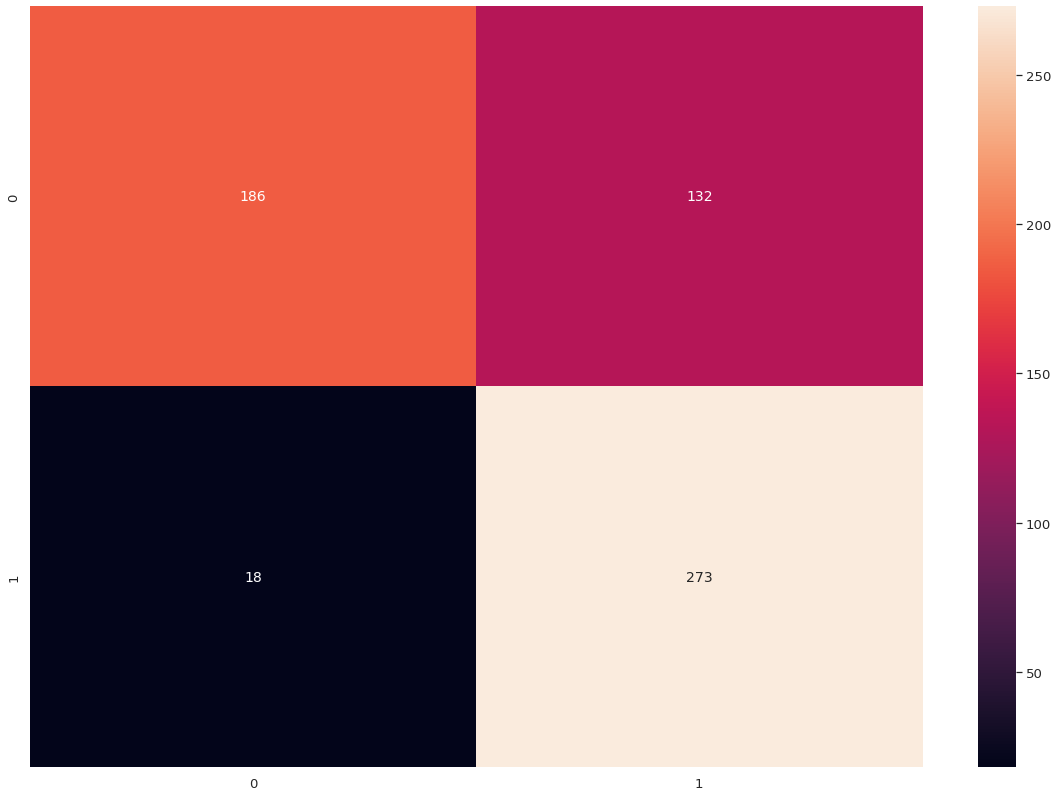

In [85]:
df_cm = pd.DataFrame(cm_test, range(2), range(2))
plt.figure(figsize=(20,14))
sn.set(font_scale=1.2) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 14}, fmt='g') # for num predict size

plt.show()

In [86]:
print(classification_report(y_true, preds, target_names=classname, digits=4))

              precision    recall  f1-score   support

         pos     0.9118    0.5849    0.7126       318
         neg     0.6741    0.9381    0.7845       291

    accuracy                         0.7537       609
   macro avg     0.7929    0.7615    0.7486       609
weighted avg     0.7982    0.7537    0.7470       609



Predict label compare with actual comment score

In [87]:
len(test_df)

609

In [88]:
query = test_df.query("`score` >= 3 and `predict_class` == 'pos'")

len(query)

305

In [89]:
query.sample(20)

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class,clean_comments,predict_class
1018,",,😀😀",4.0,0.0,5.16.1,2022-10-22 09:33:24,pos,😀😀,pos
873,ดีครับ,4.0,0.0,5.16.1,2022-10-26 08:09:48,pos,ดี,pos
1982,ดี,5.0,0.0,3.60.0,2022-10-20 03:44:23,pos,ดี,pos
638,ใช้ดีมากครับ,5.0,0.0,5.16.1,2022-10-31 19:49:35,pos,ดีมาก,pos
1345,ดีมากคับ,5.0,0.0,5.16.1,2022-10-16 10:37:46,pos,ดีมาก คับ,pos
1645,😍😍😍😍😍,5.0,0.0,0.0.0,2022-11-04 17:55:14,pos,😍😍😍😍😍,pos
207,⭐⭐🤫⭐⭐,5.0,0.0,0.0.0,2022-11-08 13:52:36,pos,⭐⭐🤫⭐⭐,pos
3166,ใช้ได้ดี สะดวกดี ถูกใจมาก,5.0,0.0,11.3.1,2022-10-23 13:13:36,pos,ได้ดี สะดวก ดี ถูกใจ,pos
426,สะดวกดี,3.0,0.0,5.16.1,2022-11-05 04:49:02,pos,สะดวก ดี,pos
1374,เยี่ยม,4.0,0.0,5.16.1,2022-10-15 13:38:02,pos,เยี่ยม,pos


In [90]:
query = test_df.query("`score` < 3 and `predict_class` == 'neg'")

len(query)

145

In [91]:
query.sample(20)

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class,clean_comments,predict_class
2881,ใช่ดีครับแอปกรุงไทยแต่ผมเข้าไม่ได้3เดือนแล้ว,2.0,0.0,0.0.0,2022-10-30 06:02:08,neg,ดี แอปพลิเคชัน กรุงไทย ผม 3 เดือน,neg
2441,ครั้งนี้ลงทะเบียนใช้งานเป็นครั้งที่ 2 ครั้งแรก...,1.0,1.0,3.59.0,2022-10-03 07:51:49,neg,ลงทะเบียน ใช้งาน 2 ครั้งแรก โหลด app s...,neg
2773,พอแอพอัพเดทก็ต้องยืนยันตัวตนใหม่ เปิดแอพจะใช้ป...,1.0,0.0,11.9.1,2022-11-03 01:37:20,neg,แอปพลิเคชัน อัปเดต ตัวตน แอปพลิเคชัน ปุบปับ ...,neg
877,เข้าแอ๊ปไม่ใด้ประมาณเดือนนึงละ หน้าจอเขียวแป้บ...,1.0,0.0,0.0.0,2022-10-26 05:23:22,neg,แอปพลิเคชัน ได้ เดือน นึง หน้าจอ เขียว แป้บ ...,neg
793,คือแย่มากปกติก็มีแอปยู่นะแต่พอเราเปลี่ยนเครื่อ...,1.0,0.0,5.16.1,2022-10-28 10:55:41,neg,แย่มาก ปกติ แอปพลิเคชัน ยู่ เครื่อง โหลด แอปพล...,neg
623,ติดตั้งไม่ได้แต่แอปอื่นได้,1.0,0.0,5.16.1,2022-11-01 05:28:52,neg,ติดตั้ง แอปพลิเคชัน,neg
2065,บอกได้ครับเดียวว่าแย่ อัตเดตแม่งอะไรทุกวัน เลย...,1.0,0.0,3.59.0,2022-10-16 18:13:52,neg,แย่ อัต เดต แม่ ง เที่ยงคืน จบ,neg
2738,เบอร์เก่าที่ลงทะเบียนไว้ไม่ได้ใช้จะเปลื่ยนเบอร...,1.0,0.0,0.0.0,2022-11-04 17:29:51,neg,เบอร์ เก่า ลงทะเบียน เปลื่ยน เบอร์ ทำ,neg
2440,แอปล่มวันนี้2รอบแล้วค่ะ ฝ่าย IT มีประโยชน์จริง...,1.0,0.0,3.59.0,2022-10-03 08:44:02,neg,แอปพลิเคชัน ล่ม 2 รอบ มีประโยชน์,neg
568,ทำไมมันติดตั้งไม่ได้ค่ะ,1.0,1.0,0.0.0,2022-11-02 09:07:08,neg,ติดตั้ง,neg


In [92]:
query = test_df.query("`score` >= 3 and `predict_class` != 'pos'")

len(query)

59

In [93]:
query.sample(20)

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class,clean_comments,predict_class
214,เปิดใน Line ปี2564,3.0,0.0,5.16.1,2022-11-08 12:18:48,neg,line ปี 2564,neg
62,แย่นะใช้แล้วสะดุดมากพาให้แอพอื่นสะดุดไปด้วยควร...,3.0,0.0,5.16.3,2022-11-11 07:21:15,neg,แย่ ใช้แล้ว สะดุด แอปพลิเคชัน สะดุด ปรับปรุง /...,neg
2930,เราประสบปัญหาทางด้านการเงิน จะกู้ก็ไม่มีสลิปเง...,5.0,0.0,10.8.1,2022-10-27 23:05:27,neg,ประสบปัญหา การเงิน กู้ สลิป เงินเดือน ทำ ก...,neg
3148,โอนเงินเข้าบัญชีไม่ได้แย่อยู่ค่ะ โอนหลายรอบแล้ว,4.0,0.0,11.6.3,2022-10-24 08:01:22,neg,โอน เงิน เข้าบัญชี แย่ โอน รอบ,neg
1951,วันที่ 21/10/65 1. ทำไมแคพหน้าจอสลิปโอนเงินไม่...,3.0,4.0,3.60.0,2022-10-21 13:08:20,neg,วันที่ 21 / 10 / 65 1 แค พ หน้าจอ สลิป โ...,neg
1495,อยากให้ปรับเรื่องการสมัคร คือ เราใช้ ไวฟาย แช้...,4.0,0.0,5.16.1,2022-10-13 00:37:05,neg,เรื่อง สมัคร ไว ฟาย แช้ว เวลา สมัคร ...,neg
821,้เยี่ยมครับ,5.0,0.0,0.0.0,2022-10-27 13:38:25,pos,้ เยี่ยม,neg
2237,แอฟไม่สามารถอัพเดตได้,4.0,0.0,3.53.0,2022-10-09 05:27:00,neg,แอปพลิเคชัน อัปเดต,neg
2012,ไม่มีปัญหาอะไรนะ บ่นกันไปเอง,5.0,0.0,3.59.0,2022-10-18 15:43:11,pos,มีปัญหา บ่น,neg
1759,appไม่แจ้งเตือนเลยปรับปรุงด่วนๆนอกนั้นดีหมดแก้...,3.0,0.0,0.0.0,2022-10-31 04:56:26,neg,app แจ้ง เตือน ปรับปรุง ด่วน ดี ขะ ดาว,neg


In [94]:
query = test_df.query("`score` < 3 and `predict_class` != 'neg'")

len(query)

100

In [95]:
query.sample(20)

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class,clean_comments,predict_class
1384,หมุนอยู่นั่นอัพก็ไม่อัพ,2.0,0.0,5.16.0,2022-10-15 09:42:08,neg,หมุน อยู่ อัพ อัพ,pos
2157,ล่มบ่อยเกิน,1.0,0.0,3.58.0,2022-10-12 06:16:05,neg,ล่ม,pos
2321,โปรดแจ้งเตือนด้วยคับถ้ามีการอัปเดทอะไรคับ เดือ...,2.0,1.0,3.59.0,2022-10-07 17:38:23,neg,โปรด แจ้ง เตือน คับ อัปเดต คับ เดือดร้อน,pos
330,เปลี่ยนเครื่องใหม่แต่เข้าไม่ได้ ลบแล้วตั้งใหม่...,1.0,0.0,5.16.1,2022-11-06 06:52:39,neg,เครื่อง ลบ ตั้งใหม่ เข้าไม้,pos
756,ช้ามากกว่าจะเข้าได้,1.0,0.0,0.0.0,2022-10-29 09:05:16,neg,,pos
2194,ธนาคารบ้าอะไร ต้องล่มหลังเที่ยงคืนตลอด,2.0,0.0,3.59.0,2022-10-10 18:12:36,neg,ธนาคาร บ้า ล่ม เที่ยงคืน,pos
19,ห่วยแตกโคตรเลยประลอดปรอทหัก,1.0,0.0,5.16.3,2022-11-12 00:33:00,neg,ห่วยแตก โคตร ประ ลอด ปรอท หัก,pos
2822,แสกนหน้าไม่ได้เข้าแอพก็ไม่ได้จะโอนเงินต้องไปธน...,1.0,0.0,11.9.1,2022-11-01 07:19:31,neg,แส กน หน้า แอปพลิเคชัน โอน เงิน ธนาคาร หรอ,pos
3078,ห่วย,1.0,0.0,0.0.0,2022-10-25 08:01:41,neg,ห่วย,pos
1742,การแจ้งเตือนเงินเข้าไม่ดีเลย,2.0,0.0,3.58.0,2022-10-31 14:51:37,neg,แจ้ง เตือน เงิน ดี,pos


Predict label compare with actual label

In [96]:
query = test_df.query("`class` == 'pos' and `predict_class` == 'pos'")

len(query)

273

In [97]:
query.sample(20)

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class,clean_comments,predict_class
2972,เยี่ยมครับ,5.0,0.0,11.9.1,2022-10-26 12:22:37,pos,เยี่ยม,pos
14,ดีค่ะ,5.0,0.0,5.16.3,2022-11-12 02:20:16,pos,ดี,pos
2078,ดี,5.0,0.0,3.59.0,2022-10-16 09:05:20,pos,ดี,pos
1650,ดี,5.0,1.0,3.60.0,2022-11-04 09:08:01,pos,ดี,pos
2694,ใช้งานสะดวกสบาย,5.0,0.0,11.9.1,2022-11-06 17:08:55,pos,ใช้งาน สะดวกสบาย,pos
3154,ดีมากๆครับ,5.0,0.0,11.9.1,2022-10-23 18:20:19,pos,ดีมาก,pos
167,ดี,5.0,0.0,5.16.1,2022-11-09 09:10:40,pos,ดี,pos
3158,ดี,5.0,0.0,11.9.1,2022-10-23 17:11:22,pos,ดี,pos
628,ดี,4.0,0.0,5.16.1,2022-11-01 03:31:09,pos,ดี,pos
814,ใช่ดีมากคับ,5.0,0.0,5.16.1,2022-10-28 00:00:18,pos,ดีมาก คับ,pos


In [98]:
query = test_df.query("`class` == 'neg' and `predict_class` == 'neg'")

len(query)

186

In [99]:
query.sample(20)

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class,clean_comments,predict_class
111,คียต่สเดิม้ตอบฃต์,5.0,0.0,5.16.3,2022-11-10 09:09:49,neg,คียต่ส เดิม ้ ตอบ ฃต์,neg
322,เปลี่ยนโทรศัพท์ใหม่แล้วเข้าแอปไม่ได้เป็นเพราะอ...,5.0,0.0,5.16.2,2022-11-06 08:18:42,neg,โทรศัพท์ แอปพลิเคชัน เพราะอะไร ?,neg
817,อัฟเดตช้ามากๆเลยครับใชังานแต่ละทีก็ต้องรอเป็นพ...,2.0,0.0,5.16.1,2022-10-27 21:38:47,neg,อัฟ เดต ใชั งาน รอ พักใหญ่,neg
2994,ทำมั้ยตอนนี้เติมช็อปปี้เพไม่ได้คะ ที่ผ่านเต็มไ...,1.0,0.0,11.9.1,2022-10-26 03:54:50,neg,ทำ ตอนนี้ เติม ช็อป ปี้ เพ เต็ม เ เก้ ไข ด...,neg
1495,อยากให้ปรับเรื่องการสมัคร คือ เราใช้ ไวฟาย แช้...,4.0,0.0,5.16.1,2022-10-13 00:37:05,neg,เรื่อง สมัคร ไว ฟาย แช้ว เวลา สมัคร ...,neg
1812,คุณคืออันดับที่1ที่ผมเลือกใช้บริการ แต่เมื่อถึ...,1.0,0.0,3.60.0,2022-10-28 13:49:03,neg,อันดับ 1 ผม เลือก บริการ ถึงคราว ทำ สินเชื่อ...,neg
789,แอพล่มบ่อยเกิน,1.0,0.0,5.16.1,2022-10-28 12:06:40,neg,แอปพลิเคชัน ล่ม,neg
1951,วันที่ 21/10/65 1. ทำไมแคพหน้าจอสลิปโอนเงินไม่...,3.0,4.0,3.60.0,2022-10-21 13:08:20,neg,วันที่ 21 / 10 / 65 1 แค พ หน้าจอ สลิป โ...,neg
1214,Line BK ขอมาสองปีแล้วก้ไม่เห็นผ่านสักที แต่ก็ม...,1.0,1.0,5.16.1,2022-10-18 11:40:01,neg,line bk สอง ปี ก้ สักที ข้อความ เด้ง สมั...,neg
362,ห่วยสุดๆ ก่อนหน้ายังใช่ได้ พออัพเดทเท่านั้นแระ...,1.0,2.0,5.16.1,2022-11-05 19:02:47,neg,ห่วย อัปเดต แระ จบ !! เซ็ง เด้ง ดด!!!,neg


In [100]:
query = test_df.query("`class` == 'pos' and `predict_class` != 'pos'")

len(query)

18

In [102]:
query

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class,clean_comments,predict_class
2012,ไม่มีปัญหาอะไรนะ บ่นกันไปเอง,5.0,0.0,3.59.0,2022-10-18 15:43:11,pos,มีปัญหา บ่น,neg
1337,สมัครได้แล้วใช้เบอร์เดิมที่ลงทะเบียน แล้ว สมัค...,5.0,0.0,5.16.1,2022-10-16 12:20:23,pos,สมัคร เบอร์ เดิม ลงทะเบียน สมัคร,neg
821,้เยี่ยมครับ,5.0,0.0,0.0.0,2022-10-27 13:38:25,pos,้ เยี่ยม,neg
1011,เปนแอบที่ใช่งานได้เร็ว สมัครง่ายๆ,5.0,0.0,5.15.8,2022-10-22 15:41:57,pos,เปน แอปพลิเคชัน งาน สมัคร,neg
3492,ครบรอบ33 ปี ลูกค้ากรุงไทย ครับครบรอบขอบคุณ กรุ...,5.0,3.0,11.9.1,2022-10-12 10:21:25,pos,ครบรอบ 33 ปี ลูกค้า กรุงไทย ครบรอบ ขอบคุ...,neg
3511,ใช้งานง่ายดีครับ,5.0,0.0,11.5.5,2022-10-11 15:07:36,pos,ใช้งาน ดี,neg
1052,- Choose a special occasional slip and send an...,5.0,0.0,5.16.1,2022-10-21 13:38:40,pos,choose special occasional slip s...,neg
595,ธนาคารอยู่ในมือถือว่าสุดยอด,5.0,0.0,5.16.1,2022-11-01 14:12:33,pos,ธนาคาร มือ สุดยอด,neg
1395,ใช้บริการของธนาคารกสิกรไทยมาตลอดไม่เคยเปลี่ยน ...,5.0,0.0,5.16.1,2022-10-15 03:54:15,pos,บริการ ธนาคาร กสิกรไทย บริการ ดีเยี่ยม,neg
3546,"ตี. .. \ "":)ii../ I. / ! /I ././ I / .. /",3.0,0.0,11.9.1,2022-10-10 07:36:26,pos,ตี \ : ii / / ! / // / /,neg


In [103]:
query = test_df.query("`class` == 'neg' and `predict_class` != 'neg'")

len(query)

132

In [104]:
query.sample(20)

,content,score,thumbsUpCount,reviewCreatedVersion,timestamp,class,clean_comments,predict_class
1353,ระบบไม่ค่อยเสถียรเลยช่วงหลังๆ,2.0,0.0,5.16.1,2022-10-16 07:01:35,neg,ระบบ เสถียร,pos
2399,แอบหล่มบ่อยมากแก้ไขด้วยค่ะ,1.0,0.0,0.0.0,2022-10-05 03:48:44,neg,แอปพลิเคชัน หล่ม,pos
1820,ใช้ไม่ได้ ค้าง ปัญหาเยอะ,1.0,0.0,3.19.0,2022-10-28 04:11:55,neg,ใช้ไม่ได้ ค้าง ปัญหา,pos
2243,แย่มาก อัปเดตบ่อยไป !!,1.0,0.0,3.54.0,2022-10-09 00:36:36,neg,แย่มาก อัปเดต !!,pos
1413,ยังเข้าใช้ไม่ได้เลยครับ,5.0,0.0,5.16.1,2022-10-14 14:41:29,neg,ใช้ไม่ได้,pos
2321,โปรดแจ้งเตือนด้วยคับถ้ามีการอัปเดทอะไรคับ เดือ...,2.0,1.0,3.59.0,2022-10-07 17:38:23,neg,โปรด แจ้ง เตือน คับ อัปเดต คับ เดือดร้อน,pos
2780,ทำไมธนาคารไม่อัปเดตยอด,1.0,0.0,11.9.1,2022-11-02 20:08:17,neg,ธนาคาร อัปเดต ยอด,pos
2753,แย่ แสกนใบหน้าไม่ผ่าน สมัครยาก,1.0,0.0,11.9.1,2022-11-04 01:35:32,neg,แย่ แส กน ใบหน้า สมัคร,pos
2915,ห่วย,1.0,3.0,11.9.1,2022-10-28 13:59:20,neg,ห่วย,pos
2505,ระบบล่มบ่อยยังครับ,1.0,0.0,3.59.0,2022-10-01 10:59:39,neg,ระบบ ล่ม,pos


Word cloud - positive comment

In [105]:
query_pos = test_df.query("`class` == 'pos' and `predict_class` == 'pos'")

from wordcloud import WordCloud
text = " ".join(i for i in test_df.clean_comments)
stop_words = ["ดีมาก", "ดี", "ห่วย","ห่วยแตก","โคตรห่วย","แย่มาก","แย่","แย่จัง","กาก","ล่ม","ระบบล่ม","ปรับปรุง",
              "แอพพลิเคชันล่ม","แอปพลิเคชันล่ม","แอปพลิเคชันมีปัญหา","แอปพลิเคชันแย่มาก","แอปพลิเคชันเด้ง","ยุ่งยาก",
              "ลบติดตั้งใหม่","ล้ม","ใช้ไม่ได้","มีปัญหา","เด้ง","เสียเวลา","อัปเดตห่วย","ดีคับ","ok",
              "เยี่ยม","ดีมากคับ","app","แอปพลิเคชัน"] + th_stop_words
regexp = r"[ก-๙a-zA-Z']+"
wordcloud = WordCloud(
                      font_path="/content/THSarabunNew.ttf", 
                      relative_scaling = 0.3,
                      min_font_size=1,
                      background_color="white",
                      width=1024,
                      height=768,
                      max_words=2000, 
                      #mask=mask,
                      colormap='plasma', 
                      scale=3,
                      font_step=4,
                      contour_width=3, 
                      contour_color='steelblue', 
                      collocations=False,
                      regexp=regexp,
                      margin=2,
                      stopwords = stop_words
                      ).generate(text)

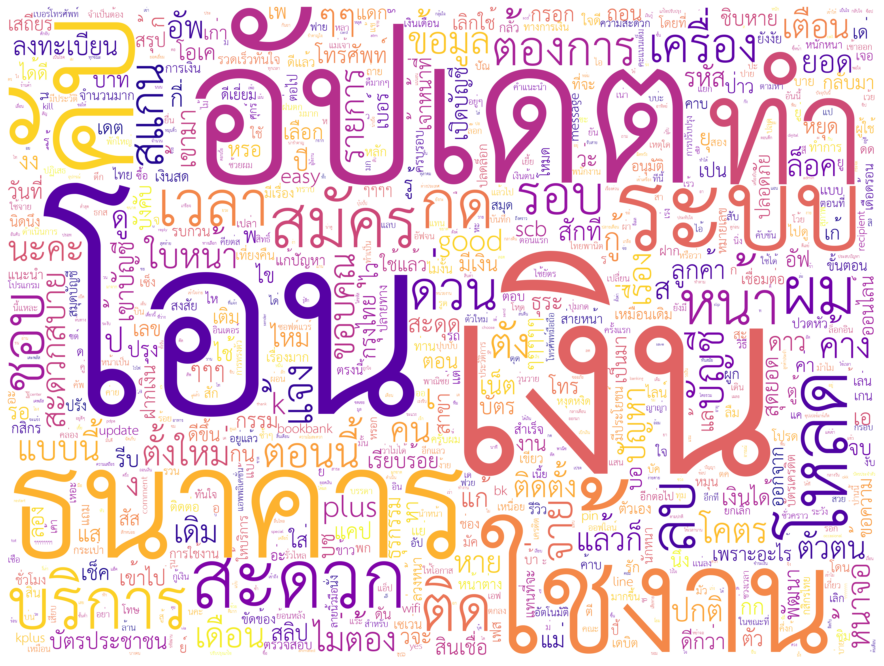

In [106]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

In [107]:
print(wordcloud.words_.keys())

dict_keys(['เงิน', 'โอน', 'อัปเดต', 'ธนาคาร', 'ทำ', 'ใช้งาน', 'คับ', 'ระบบ', 'สะดวก', 'โหลด', 'บริการ', 'สมัคร', 'กด', 'ผม', 'ติด', 'ลบ', 'เวลา', 'หน้า', 'ชอบ', 'ด่วน', 'รอบ', 'เครื่อง', 'ต้องการ', 'สแกน', 'ตอนนี้', 'บัญชี', 'จ่าย', 'ตัง', 'แจ้ง', 'ข้อมูล', 'ค้าง', 'ใบหน้า', 'แบบนี้', 'ขอบคุณ', 'เ', 'นะคะ', 'โคตร', 'คน', 'เดือน', 'ตั้งใหม่', 'เตือน', 'ไม่ต้อง', 'ๆๆ', 'สะดวกสบาย', 'ง', 'รายการ', 'อัพ', 'ยอด', 'แล้วก็', 'ป', 'ปัญหา', 'เดิม', 'เรื่อง', 'กู้', 'ตัวตน', 'ดู', 'หน้าจอ', 'good', 'k', 'plus', 'หาย', 'ปกติ', 'ส', 'ติดตั้ง', 'ล็อค', 'ลงทะเบียน', 'เข้ามา', 'เข้าบัญชี', 'ดาว', 'รหัส', 'ลูกค้า', 'ไหม', 'แก้', 'เน็ต', 'สักที', 'ปี', 'กี่', 'งง', 'สะดุด', 'บัตรประชาชน', 'เงินได้', 'โทรศัพท์', 'พ', 'รีบ', 'รอ', 'บัตร', 'กก', 'scb', 'เปิดบัญชี', 'สุดยอด', 'ดีกว่า', 'กรุงไทย', 'ธุระ', 'แม่', 'บช', 'แคป', 'โอเค', 'แส', 'กน', 'ก้', 'บาท', 'ยุ', 'เอ', 'สลิป', 'ไข', 'ๆๆๆ', 'รู้', 'หยุด', 'ว่ะ', 'กรอก', 'เลข', 'บอ', 'เรียบร้อย', 'อัฟ', 'ตัว', 'ถอน', 'เข้าไป', 'จบ', 'วันที่', 'ใส่', 'งาน', 'ธ

Word cloud - negative comment

In [108]:
query_neg = test_df.query("`class` == 'neg' and `predict_class` == 'neg'")


text = " ".join(i for i in test_df.clean_comments)
stop_words = ["ดีมากคับ","ดี","ดีมาก","ดีคับ","เยี่ยม","แย่มาก","แย่่","Good","ok","ห่วย","ห่วยแตก","ได้ดี","ชอบ","app","แอปพลิเคชัน"] + th_stop_words
regexp = r"[ก-๙a-zA-Z']+"
wordcloud = WordCloud(
                      font_path="/content/THSarabunNew.ttf", 
                      relative_scaling = 0.3,
                      min_font_size=1,
                      background_color="white",
                      width=1024,
                      height=768,
                      max_words=2000, 
                      #mask=mask,
                      colormap='plasma', 
                      scale=3,
                      font_step=4,
                      contour_width=3, 
                      contour_color='steelblue', 
                      collocations=False,
                      regexp=regexp,
                      margin=2,
                      stopwords = stop_words
                      ).generate(text)

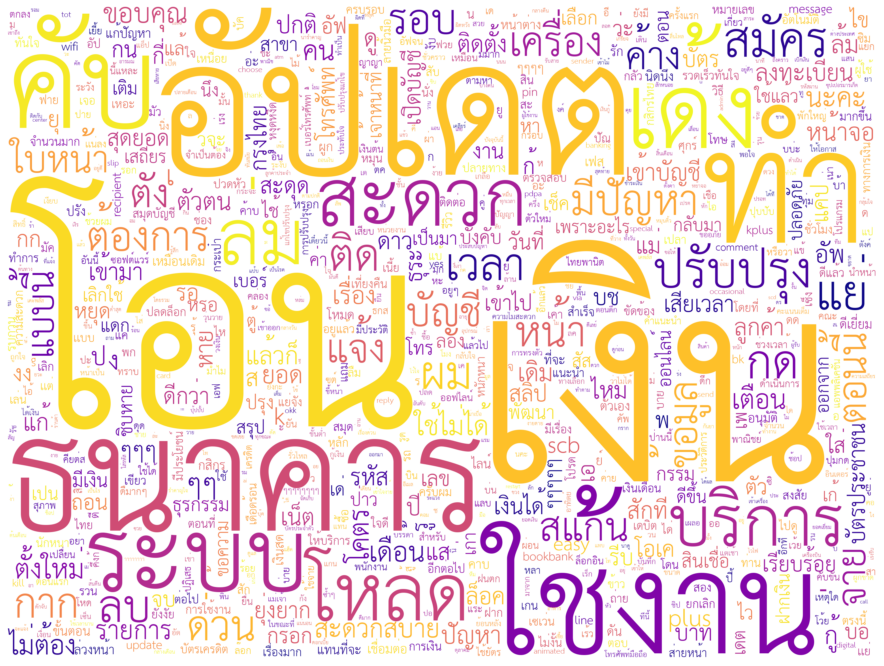

In [109]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

In [110]:
print(wordcloud.words_.keys())

dict_keys(['เงิน', 'โอน', 'อัปเดต', 'ธนาคาร', 'ทำ', 'ใช้งาน', 'คับ', 'เด้ง', 'ระบบ', 'สะดวก', 'โหลด', 'ล่ม', 'บริการ', 'ปรับปรุง', 'แย่', 'สมัคร', 'กด', 'ผม', 'ติด', 'ลบ', 'เวลา', 'มีปัญหา', 'หน้า', 'ด่วน', 'กาก', 'รอบ', 'เครื่อง', 'ต้องการ', 'สแกน', 'ตอนนี้', 'บัญชี', 'จ่าย', 'ตัง', 'แจ้ง', 'ข้อมูล', 'ค้าง', 'ใบหน้า', 'แบบนี้', 'ขอบคุณ', 'เ', 'นะคะ', 'โคตร', 'คน', 'เดือน', 'ตั้งใหม่', 'ใช้ไม่ได้', 'เตือน', 'ไม่ต้อง', 'ๆๆ', 'สะดวกสบาย', 'ง', 'รายการ', 'อัพ', 'ยอด', 'แล้วก็', 'ป', 'ปัญหา', 'ล้ม', 'เดิม', 'เรื่อง', 'กู้', 'ตัวตน', 'ดู', 'หน้าจอ', 'k', 'plus', 'หาย', 'ปกติ', 'ส', 'ติดตั้ง', 'ล็อค', 'ลงทะเบียน', 'เข้ามา', 'เข้าบัญชี', 'ดาว', 'รหัส', 'ลูกค้า', 'ไหม', 'แก้', 'เน็ต', 'สักที', 'ปี', 'กี่', 'งง', 'สะดุด', 'บัตรประชาชน', 'เงินได้', 'โทรศัพท์', 'พ', 'รีบ', 'รอ', 'บัตร', 'กก', 'scb', 'เปิดบัญชี', 'เสียเวลา', 'สุดยอด', 'ยุ่งยาก', 'ดีกว่า', 'กรุงไทย', 'ธุระ', 'แม่', 'บช', 'แคป', 'โอเค', 'แส', 'กน', 'ก้', 'บาท', 'ยุ', 'เอ', 'สลิป', 'ไข', 'ๆๆๆ', 'รู้', 'หยุด', 'ว่ะ', 'กรอก', 'เลข', 'บ